In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "D:/datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housedata(housing_url = HOUSING_URL,housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housedata()

C:\Users\LENOVA\AppData\Local\Temp\ipykernel_484\586090135.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [6]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()
# There are some some instances missing total_bedroom feature 
# Every feature present here are numerical except for ocean_proximity which is categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()
# There are total 5 types of category in ocean_proximity feature and island is the least among them with 1H ocean has most count

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


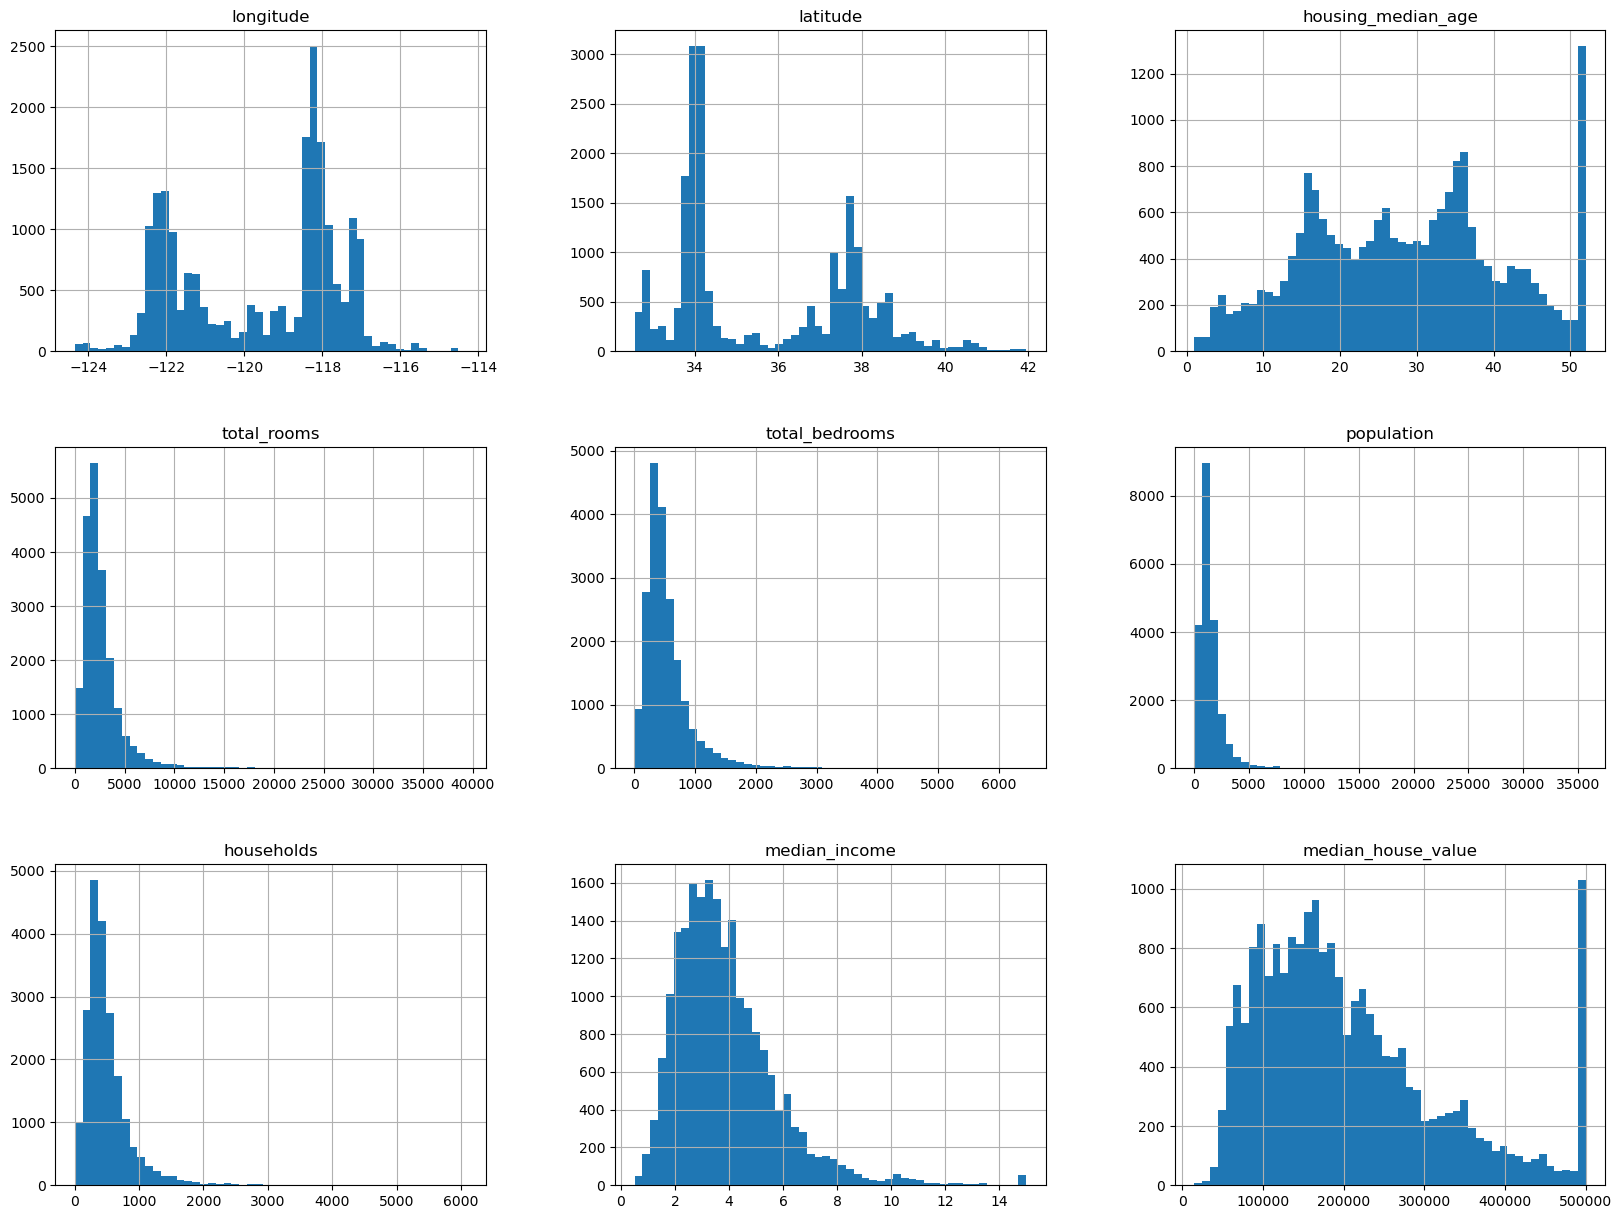

In [11]:
%matplotlib inline
housing.hist(bins = 50, figsize = (20,15))
plt.show()

# The house over age 45 to 50 has more in this dataset
# Total_rooms and total_bedrooms and households has same distribution which means these two are positively correlated and it also matches the population count
# The median_income has slightly right skewed with almost bell shape curve close to normal distribution we can change it
# The median house value has  right skewed with having outlier at value 500000 value

In [12]:
def split_train_test(data,ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [13]:
train_set,test_set = split_train_test(housing,0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [14]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [15]:
def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [17]:
# we can make unique identifier by combining latitude and longitude which is always unique as it depicts the location of a house property

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [18]:
# we can use inbuilt function train_test_split from scikit library without manually declaring the functions

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

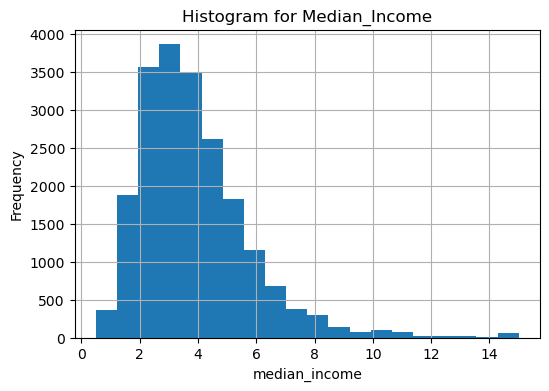

In [19]:
plt.figure(figsize = (6,4))
housing["median_income"].hist(bins = 20)
plt.xlabel("median_income")
plt.ylabel('Frequency')
plt.title("Histogram for Median_Income")
plt.show()


# There are less samples of data for median income over 6 so we have to normalize this attribute

In [20]:
housing['income_cat'] = np.ceil(housing["median_income"] / 1.5)
housing.where(housing["income_cat"] < 5, 5.0, inplace = True)

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

    

In [22]:
housing["median_income"].value_counts() / len(housing)


median_income
5.0000    0.115407
3.1250    0.002374
2.8750    0.002229
2.6250    0.002132
4.1250    0.002132
            ...   
2.4677    0.000048
5.3064    0.000048
1.9787    0.000048
5.6431    0.000048
1.0972    0.000048
Name: count, Length: 10727, dtype: float64

In [23]:
housing["income_cat"].value_counts() / len(housing)



income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

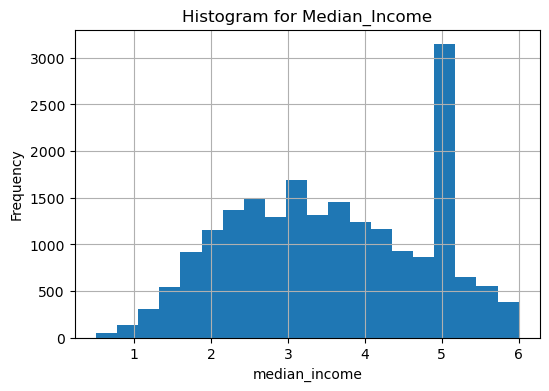

In [24]:
plt.figure(figsize = (6,4))
housing["median_income"].hist(bins = 20)
plt.xlabel("median_income")
plt.ylabel('Frequency')
plt.title("Histogram for Median_Income")
plt.show()

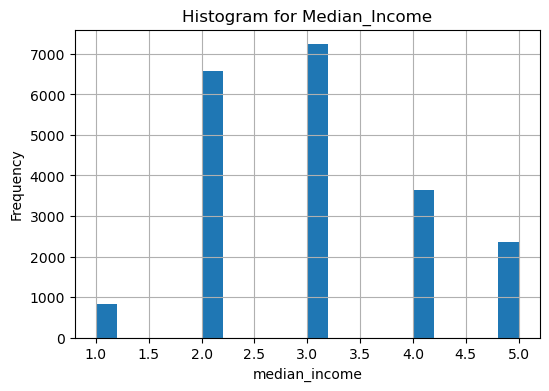

In [25]:
plt.figure(figsize = (6,4))
housing["income_cat"].hist(bins = 20)
plt.xlabel("median_income")
plt.ylabel('Frequency')
plt.title("Histogram for Median_Income")
plt.show()

In [26]:
for set in (start_train_set, start_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)

In [27]:
housing = start_train_set.copy()

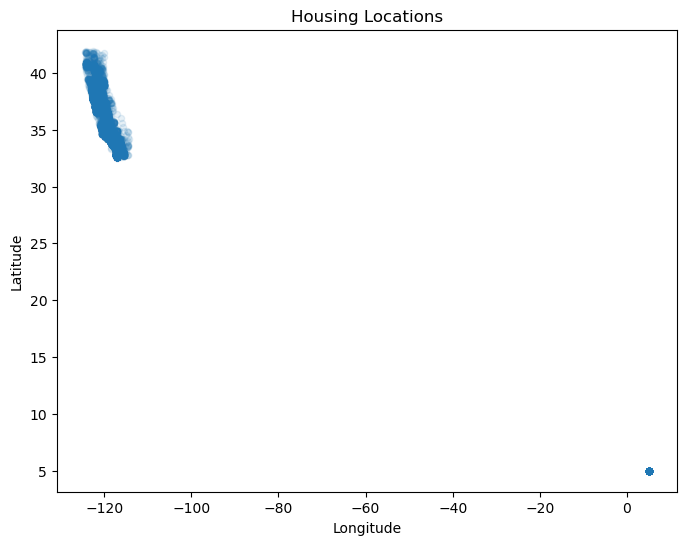

In [42]:
import matplotlib.pyplot as plt

# Plot geographical scatter plot of housing data
housing.plot(kind="scatter", x="longitude", y="latitude", 
             alpha = 0.1,  # Density of the data points
             figsize=(8, 6), 
             title="Housing Locations")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

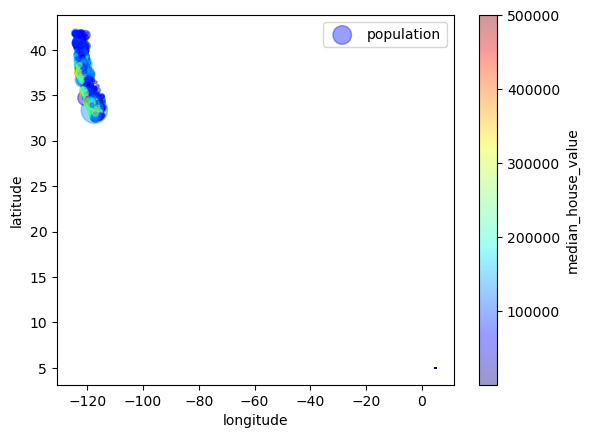

In [52]:
housing.plot(kind = "scatter", x= "longitude", y = "latitude", 
             alpha = 0.4, s = housing["population"]/100, label = "population",
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,)

plt.legend()
plt.show()

In [55]:
corr_matrix = housing.corr(numeric_only=True)

In [56]:
corr_matrix["median_house_value"].sort_values(ascending = True)

longitude            -0.542418
median_income         0.168697
population            0.208402
total_rooms           0.288693
total_bedrooms        0.291305
households            0.304717
housing_median_age    0.406482
latitude              0.503408
median_house_value    1.000000
Name: median_house_value, dtype: float64

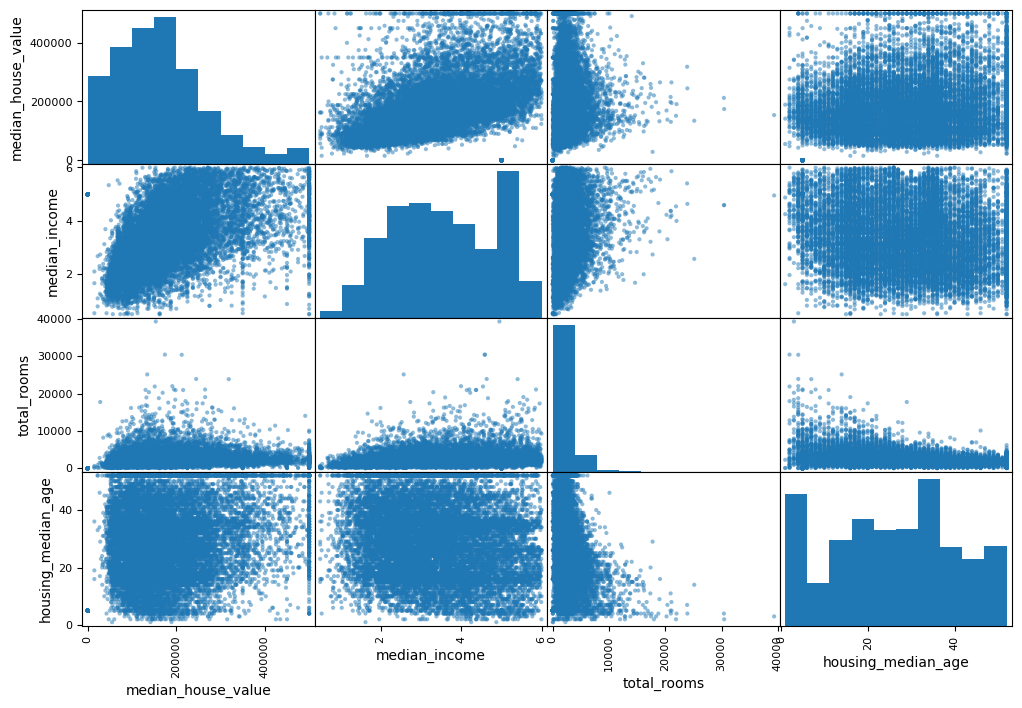

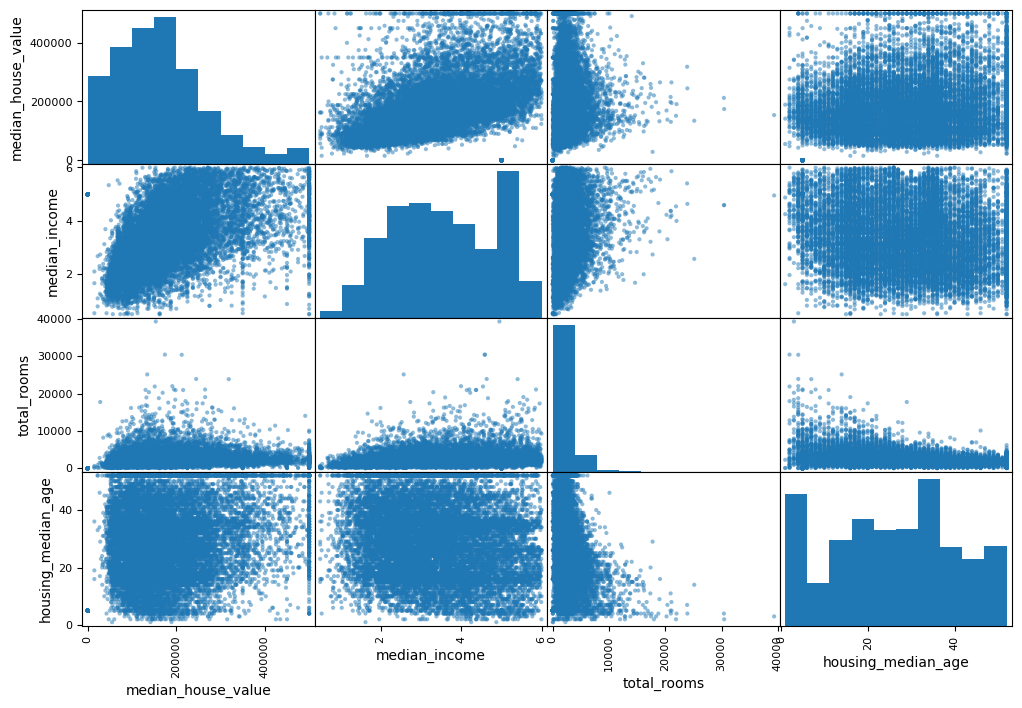

In [61]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes] , figsize = (12,8))
plt.show()

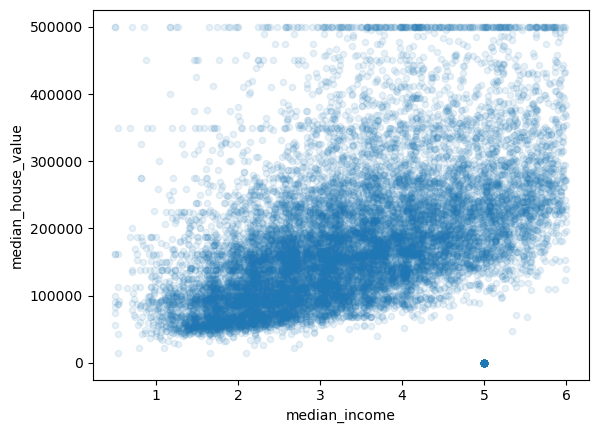

In [63]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)
plt.show()

# Median income and Median house value are the only attributes are some positive relation between them
# There is line cap at 500000 suggesting the data points are processed at that maximum level and we can see similar sligh horizontal line like 350000
# which causes poor learning of models

In [64]:
 housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
 housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
 housing["population_per_household"]=housing["population"]/housing["households"]

In [66]:
corr_matrix = housing.corr(numeric_only = True)

In [67]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
latitude                    0.503408
housing_median_age          0.406482
households                  0.304717
total_bedrooms              0.291305
total_rooms                 0.288693
rooms_per_household         0.270854
population                  0.208402
median_income               0.168697
population_per_household    0.025907
bedrooms_per_room          -0.540589
longitude                  -0.542418
Name: median_house_value, dtype: float64